### iowa_liquor_sales

`pip install google-cloud-bigquery-storage`

`pip install google-cloud-bigquery`

In [122]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [1]:
import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"]=r"C:\Users\i.betlei\Desktop\My Project 72349-d7a61c5e8ec0.json"

In [2]:
import google.auth
from google.cloud import bigquery
from google.cloud import bigquery_storage

credentials, your_project_id = google.auth.default(
    scopes=["https://www.googleapis.com/auth/cloud-platform"]
)

bqclient = bigquery.Client(credentials=credentials, project=your_project_id,)
bqstorageclient = bigquery_storage.BigQueryReadClient(credentials=credentials)

In [6]:
query_string = """
SELECT *  FROM `bigquery-public-data.iowa_liquor_sales.sales` 
"""
tmp = bqclient.query(query_string)

query_result = tmp.result() 
df = query_result.to_dataframe() 

In [154]:
df.shape

(19883996, 28)

In [155]:
df.head()

,invoice_and_item_number,date,store_number,store_name,address,city,zip_code,store_location,county_number,county,...,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons,profit,lat_and_long,day_of_week,year
0,INV-10122700034,2018-01-31,2502,Hy-Vee Wine and Spirits / Ankeny,410 North Ankeny Blvd,Ankeny,50021,None,77,POLK,...,11.07,16.61,12,199.32,9.0,2.38,66.48,"(None, None)",Wednesday,2018
1,INV-06181100009,2017-07-19,2637,Hy-Vee #5 / Davenport,2351 W Locust,Davenport,52804,POINT (-90.611972 41.538207),82,SCOTT,...,11.07,16.61,12,199.32,9.0,2.38,66.48,"(-90.611972, -90.611972)",Wednesday,2017
2,INV-03318800058,2017-02-16,2648,Hy-Vee #4 / Wdm,555 S 51st St,West Des Moines,50265,POINT (-93.773557 41.561197),77,POLK,...,11.07,16.61,12,199.32,9.0,2.38,66.48,"(-93.773557, -93.773557)",Thursday,2017
3,INV-03031500042,2017-02-01,3990,Cork and Bottle / Oskaloosa,309 A Ave West,Oskaloosa,52577,POINT (-92.648153 41.296228),62,MAHASKA,...,5.50,8.25,24,198.00,9.0,2.38,66.00,"(-92.648153, -92.648153)",Wednesday,2017
4,INV-09592700165,2018-01-03,2670,Hy-Vee Food Store / Coralville,2004 8th St,Coralville,52241,POINT (-91.591868 41.682337000000004),52,JOHNSON,...,11.07,16.61,12,199.32,9.0,2.38,66.48,"(-91.591868, -91.591868)",Wednesday,2018


In [158]:
df.describe()

,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons,profit,year
count,1.988400e+07,1.988400e+07,1.988400e+07,1.988400e+07,1.988400e+07,1.988400e+07,1.988400e+07,1.988400e+07,1.988400e+07,1.988400e+07
mean,1.227531e+01,9.106559e+02,9.947094e+00,1.493520e+01,1.033897e+01,1.352686e+02,9.137389e+00,2.412446e+00,4.521063e+01,2.016092e+03
std,7.671146e+00,6.632204e+02,1.073576e+01,1.610347e+01,2.807438e+01,4.702208e+02,3.377767e+01,8.923172e+00,1.571840e+02,2.555068e+00
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.017200e+02,2.012000e+03
25%,6.000000e+00,7.500000e+02,5.500000e+00,8.250000e+00,3.000000e+00,3.150000e+01,1.500000e+00,4.000000e-01,1.050000e+01,2.014000e+03
50%,1.200000e+01,7.500000e+02,8.200000e+00,1.237000e+01,6.000000e+00,7.176000e+01,5.000000e+00,1.320000e+00,2.400000e+01,2.016000e+03
75%,1.200000e+01,1.000000e+03,1.205000e+01,1.808000e+01,1.200000e+01,1.395000e+02,1.050000e+01,2.770000e+00,4.680000e+01,2.018000e+03
max,3.360000e+02,3.780000e+05,7.680000e+03,1.152000e+04,1.500000e+04,2.795573e+05,1.500000e+04,3.962580e+03,9.322560e+04,2.020000e+03


In [159]:
df.dtypes

invoice_and_item_number            object
date                       datetime64[ns]
store_number                       object
store_name                         object
address                            object
city                               object
zip_code                           object
store_location                     object
county_number                      object
county                             object
category                           object
category_name                      object
vendor_number                      object
vendor_name                        object
item_number                        object
item_description                   object
pack                                int64
bottle_volume_ml                    int64
state_bottle_cost                 float64
state_bottle_retail               float64
bottles_sold                        int64
sale_dollars                      float64
volume_sold_liters                float64
volume_sold_gallons               

In [160]:
df.isnull().sum()

invoice_and_item_number          0
date                             0
store_number                     0
store_name                       0
address                      79927
city                         79926
zip_code                     79971
store_location             1907069
county_number               156731
county                      156729
category                     16974
category_name                25040
vendor_number                    5
vendor_name                      3
item_number                      0
item_description                 0
pack                             0
bottle_volume_ml                 0
state_bottle_cost                0
state_bottle_retail              0
bottles_sold                     0
sale_dollars                     0
volume_sold_liters               0
volume_sold_gallons              0
profit                           0
lat_and_long                     0
day_of_week                      0
year                             0
dtype: int64

In [161]:
df = df.dropna(subset=['sale_dollars'])

#### 1. Profit and margin

In [162]:
# df['profit'] = (df['state_bottle_retail'] - df['state_bottle_cost']) * df['bottles_sold']
df['profit'] = (np.array(df['state_bottle_retail']) - np.array(df['state_bottle_cost'])) * np.array(df['bottles_sold'])


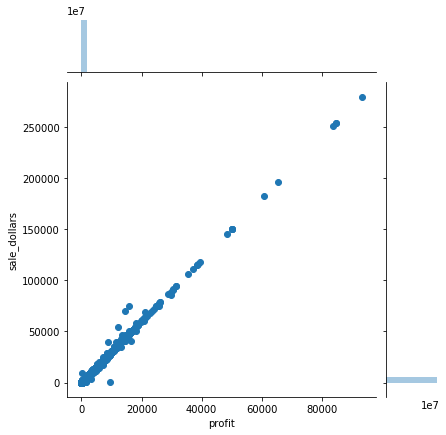

In [163]:
sns.jointplot(x=df['profit'], y=df['sale_dollars'], kind='scatter')
plt.show()

    Margin:

In [164]:
print(round(df['profit'].sum() / df['sale_dollars'].sum() * 100, 2), '% ')

33.42 % 


####  2. Parse store_location

In [165]:
def lat_and_long(el):
    """divides the tape into two elements, longitude and latitude"""
    
    if el == None:
        return None, None
    
    first_par = el.find('(')
    second_par = el.find(')')
    res = el[first_par+1:second_par].split()
    
    return res[0], res[0]

In [166]:
df['lat_and_long'] = df['store_location'].map(lat_and_long)

#### 3. Time Series Analysis

In [167]:
df['date'] = pd.to_datetime(df['date'])


df_timeseries = df.groupby('date')['sale_dollars'].sum().reset_index()
df_timeseries = df_timeseries.set_index('date')

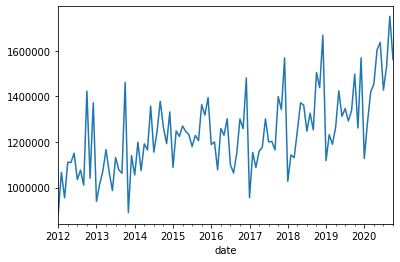

In [168]:
y = df_timeseries['sale_dollars'].resample('MS').mean()

y.plot()

#### 4. Bottle sold by day of week

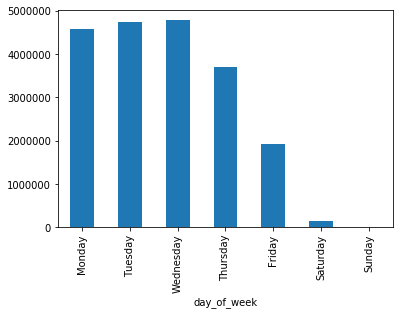

In [169]:
df['day_of_week'] = df['date'].dt.day_name()
df['day_of_week'] = pd.Categorical(df['day_of_week'], categories=
    ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday'],
    ordered=True)


df.groupby('day_of_week')['invoice_and_item_number'].count().plot(kind="bar")

#### 5. Max parameters

In [170]:
res = df.groupby(['city']).agg({'sale_dollars': ['mean', 'sum'], 'pack':['sum']}).reset_index()

    The city that makes the biggest sales:

In [171]:
res[res['sale_dollars']['sum'] == max(res['sale_dollars']['sum'])].city

211    Des Moines
Name: city, dtype: object

    The city with the largest average check:

In [172]:
res[res['sale_dollars']['mean'] == max(res['sale_dollars']['mean'])].city

242    Earling
Name: city, dtype: object

#### 6. Pivot table by county

In [173]:
df.columns

Index(['invoice_and_item_number', 'date', 'store_number', 'store_name',
       'address', 'city', 'zip_code', 'store_location', 'county_number',
       'county', 'category', 'category_name', 'vendor_number', 'vendor_name',
       'item_number', 'item_description', 'pack', 'bottle_volume_ml',
       'state_bottle_cost', 'state_bottle_retail', 'bottles_sold',
       'sale_dollars', 'volume_sold_liters', 'volume_sold_gallons', 'profit',
       'lat_and_long', 'day_of_week', 'year'],
      dtype='object')

In [174]:
res = df.groupby('county').agg({'sale_dollars': ['mean', 'sum'],
                          'pack' : ['sum'],
                          'volume_sold_liters' : ['sum'],
                          'bottles_sold' : ['sum']}).reset_index()

In [175]:
res

county sale_dollars                   pack volume_sold_liters  \
                        mean           sum      sum                sum   
0         ADAIR    99.334765  1.196388e+06   138838           84963.05   
1         ADAMS    63.658061  4.641309e+05    83616           30897.70   
2     ALLAMAKEE    96.973375  3.958841e+06   463582          303398.38   
3     APPANOOSE   122.909540  4.127179e+06   381781          286005.64   
4       AUDUBON    71.127804  7.597872e+05   115184           61487.76   
..          ...          ...           ...      ...                ...   
196   Winnebago    94.616991  3.217262e+06   377632          268775.61   
197  Winneshiek   110.057675  6.120637e+06   580777          469033.37   
198    Woodbury   147.518054  4.252060e+07  3554380         2943823.74   
199       Worth    81.661965  1.033024e+06   140442           86058.50   
200      Wright    98.674812  2.735660e+06   303452          225298.53   

    bottles_sold  
             sum  
0          97257  
1          33041  
2         283165  
3         314518  
4          64709  
..           ...  
196       258046  
197       447486  
198      3278647  
199        82797  
200       220725  

[201 rows x 6 columns]